In [140]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss
import pandas as pd
import numpy as np 
import os

In [141]:
df = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/train.csv")
df.head()

,id,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,feature_11,feature_12,feature_13,feature_14,feature_15,feature_16,feature_17,feature_18,feature_19,feature_20,feature_21,feature_22,feature_23,feature_24,feature_25,feature_26,feature_27,feature_28,feature_29,feature_30,feature_31,feature_32,feature_33,feature_34,feature_35,feature_36,feature_37,feature_38,feature_39,feature_40,feature_41,feature_42,feature_43,feature_44,feature_45,feature_46,feature_47,feature_48,feature_49,feature_50,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,feature_61,feature_62,feature_63,feature_64,feature_65,feature_66,feature_67,feature_68,feature_69,feature_70,feature_71,feature_72,feature_73,feature_74,target
0,0,0,0,6,1,0,0,0,0,7,0,0,0,3,0,1,0,0,3,3,1,0,2,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,11,0,0,0,0,0,9,0,0,0,0,0,0,3,0,1,3,0,0,0,0,0,0,0,1,1,0,0,3,0,0,0,0,0,0,2,0,0,Class_6
1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,2,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,Class_6
2,2,0,0,0,0,0,1,0,3,0,0,1,0,0,0,0,0,0,0,0,5,4,0,0,0,0,0,0,0,0,1,0,0,0,0,2,0,0,5,0,5,0,1,0,0,0,1,0,0,1,0,7,0,1,1,0,3,4,0,0,1,3,0,2,0,0,8,0,0,0,0,1,0,0,0,0,Class_2
3,3,0,0,7,0,1,5,2,2,0,1,2,0,5,0,0,4,0,0,22,2,1,0,0,0,0,3,0,37,0,1,3,13,0,10,0,3,1,1,0,7,0,0,2,0,1,0,0,0,0,0,0,10,0,0,25,1,0,1,2,0,2,0,7,0,0,0,0,4,0,2,2,0,4,3,0,Class_8
4,4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2,0,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Class_2


In [142]:
# Data pre processing

# Check for null or nan values
total_null = 0
for col in features.columns:
    s = df[col].isnull().sum()
    total_null += s

assert total_null == 0

# Select the features and target column
features = df.iloc[:,1:-1]
target = df.iloc[:,-1]

# Convert the target value in onne hot code vector --> In terms of numbers
# target = target.str.split("_").str[-1] 
# Looks like the above line can be simplified as follows (No splitting required)
target = target.str[-1] 

assert features.shape[0] == target.shape[0], "{} != {}".format(features.shape[0], target.shape[0]) 

<AxesSubplot:>

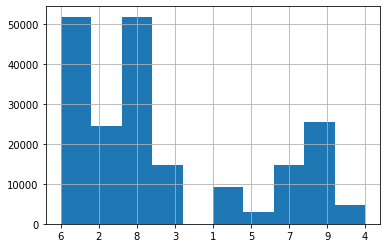

In [143]:
# Data Visualization

# The histogram shows imbalance in dataset
target.hist()

In [144]:
pd.set_option("display.max_rows", None, "display.max_columns", None)
print(features.mean())
# The mean shows that feature 19, 54 and 43 have high values --> Will it contribute more to the learning ? --> Not neccesarily as there are 72 other features :)

# Plotting the mean - https://stackoverflow.com/a/13891083/12799074
#features.mean().plot(kind='bar', figsize = (200, 200))

feature_0     0.972710
feature_1     1.168365
feature_2     2.219325
feature_3     2.296735
feature_4     0.793530
feature_5     1.431105
feature_6     1.010695
feature_7     0.673090
feature_8     1.943980
feature_9     1.719655
feature_10    1.422550
feature_11    0.980955
feature_12    2.444760
feature_13    1.078085
feature_14    1.406445
feature_15    1.413200
feature_16    1.389720
feature_17    0.317740
feature_18    1.656610
feature_19    6.186895
feature_20    1.438510
feature_21    1.031415
feature_22    1.465935
feature_23    0.572000
feature_24    1.061165
feature_25    2.348775
feature_26    0.774490
feature_27    0.789325
feature_28    2.326190
feature_29    1.581820
feature_30    0.598825
feature_31    1.856545
feature_32    1.516105
feature_33    1.556650
feature_34    0.681135
feature_35    1.162070
feature_36    0.665375
feature_37    1.500505
feature_38    1.276080
feature_39    2.332940
feature_40    1.255005
feature_41    1.159385
feature_42    0.834600
feature_43 

In [145]:
# Split the data into train and val set
features_train, features_test, target_train, target_test = train_test_split(features, target, test_size=0.2, shuffle = True)

In [146]:
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# If the depth of random forest is high --> Overfits the model!
clf = RandomForestClassifier(max_depth=10, random_state=0) 
clf.fit(features_train, target_train)

RandomForestClassifier(max_depth=10, random_state=0)

In [147]:
pred_test = clf.predict_proba(features_test)
target_test = target_test.ravel()
log_loss(target_test, pred_test)

1.7702318491458384

In [150]:
# Submission of the results
df = pd.read_csv("/kaggle/input/tabular-playground-series-jun-2021/test.csv")
feature_sub = df.iloc[:,1:]
pred_sub = clf.predict_proba(feature_sub)

In [173]:
# Get the ids
sub = df.iloc[:,:1]
sub_classes = pd.DataFrame(pred_sub, columns=['Class_1','Class_2','Class_3','Class_4','Class_5','Class_6','Class_7','Class_8','Class_9'])
sub = sub.append(sub_classes)
sub = pd.concat([df["id"], sub_classes], axis=1)
print(sub.head())

       id   Class_1   Class_2   Class_3   Class_4   Class_5   Class_6  \
0  200000  0.058657  0.356468  0.149465  0.028553  0.014252  0.136374   
1  200001  0.041262  0.107752  0.078764  0.024004  0.017399  0.264831   
2  200002  0.035355  0.057886  0.041823  0.017746  0.011495  0.457766   
3  200003  0.047102  0.120341  0.077139  0.026694  0.016979  0.248002   
4  200004  0.037680  0.118126  0.077629  0.023674  0.016110  0.300894   

    Class_7   Class_8   Class_9  
0  0.033579  0.085130  0.137522  
1  0.088008  0.244170  0.133809  
2  0.059080  0.225758  0.093091  
3  0.075951  0.247465  0.140326  
4  0.072876  0.219522  0.133491  


In [174]:
sub.to_csv('submission.csv', index=False)